In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
path =  'D:\\andrew_ml_ex14179\\ex1data1.txt'
# names添加列名，header用指定的行来作为标题，若原无标题且指定标题则设为None
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])  
data.head()


,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


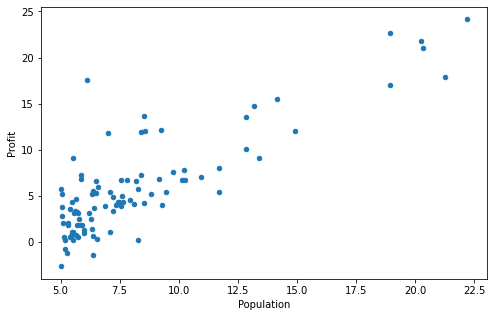

In [2]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(8,5))
plt.show()

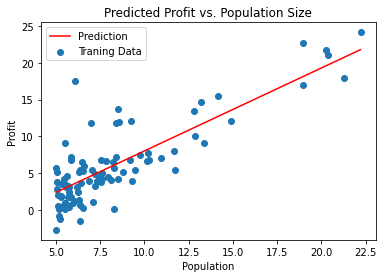

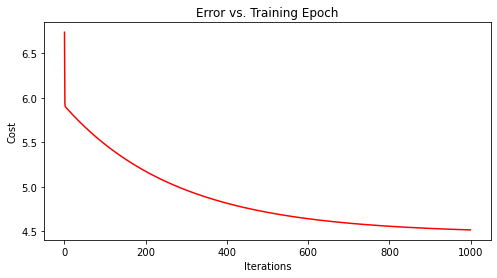

In [3]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) -  y), 2)
    return np.sum(inner) / (2 * len(X))
data.insert(0, 'Ones', 1)
# set X (training data) and y (target variable)
cols = data.shape[1]  # 列数
X = data.iloc[:,0:cols-1]  # 取前cols-1列，即输入向量
y = data.iloc[:,cols-1:cols] # 取最后一列，即目标向量
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix([0,0])
computeCost(X, y, theta)
def gradientDescent(X, y, theta, alpha, epoch):
    """reuturn theta, cost"""
    
    temp = np.matrix(np.zeros(theta.shape))  # 初始化一个 θ 临时矩阵(1, 2)
    parameters = int(theta.flatten().shape[1])  # 参数 θ的数量
    cost = np.zeros(epoch)  # 初始化一个ndarray，包含每次epoch的cost
    m = X.shape[0]  # 样本数量m
    
    for i in range(epoch):
        # 利用向量化一步求解
        #temp =theta - (alpha / m) * (X * theta.T - y).T * X
        
# 以下是不用Vectorization求解梯度下降
         error = (X * theta.T) - y  # (97, 1)
        
         for j in range(parameters):
             term = np.multiply(error, X[:,j])  # (97, 1)
             temp[0,j] = theta[0,j] - ((alpha / m) * np.sum(term))  # (1,1)
            
         theta = temp
         cost[i] = computeCost(X, y, theta)
        
    return theta, cost
alpha = 0.01
epoch = 1000
final_theta, cost = gradientDescent(X, y, theta, alpha, epoch)
computeCost(X, y, final_theta)
x = np.linspace(data.Population.min(), data.Population.max(), 100)  # 横坐标
f = final_theta[0, 0] + (final_theta[0, 1] * x)  # 纵坐标，利润

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data['Population'], data.Profit, label='Traning Data')
ax.legend(loc=2)  # 2表示在左上角
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(np.arange(epoch), cost, 'r')  # np.arange()返回等差数组
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()